# Capstone 2 Project - IPL Match Outcome Predictor    



<img src="https://github.com/sunilayyaps/datascience/blob/master/capstone-project2/ipl/images/vivo-ipl-2018.jpg?raw=true">

# Indian Premier League - Introduction
IPL competition is played amongst 8 elite clubs. The format of the game is very simple – each team will face the other 7 teams twice once in their home ground and then in other team’s ground. At the end of all the 56 matches, the top four will qualify for the playoff. The first two ranked team will play against each other in Qualifier 1 and the third and fourth team will play against each other in Qualifier 2. The winner of Qualifier 1 one will be qualified for the final and the loser will play against the winner of Qualifier 2 in the Eliminator. 

Group games do not necessarily end with one side winning. They can either have ‘no result’ if weather prevents the game from being finished or be ‘Super-over if both teams end on the same score. In the knock out rounds, ‘no result’ games are replayed on a reserve day and ‘tied’ matches are decided by ‘super-over, ensuring that there is always a winner.

In each IPL team, a total of 11 players will play the match and it must comprise of 7 Indians and 4 foreign players. The rule of 7 Indians is mandatory and was introduced to promote local players. So one of the challenges all the team faces in each match is to select the 4 foreign players from a total of 8 players. 

**I am trying to solve three problems **

**1. Predict the outcome**
To predict the result of a T-20 IPL match based on various parameters such Home advantage, First Bat, Ground conditions, Toss, Team combinations. 

**2. To assist the coach & captain in team selection** 
Who should be included on each grounds against each opposition? Who is probably going to perform better? 

**3. Fantasy League Prediction**
What should be the composition of your fantasy league team? Fantasy league team is a visual game played by the cricket fans. In a day, the fans are allowed to pick their playing 11 from the four teams who play on a day. 


### Steps for predicting the outcome
1. We will clean our dataset
2. Split it into training and testing data (12 features & 1 target (winning team (Home/Away/Tie))
3. Train 3 different classifiers on the data -Logistic Regression -Support Vector Machine -XGBoost
4. Use the best Classifer to predict who will win given an away team and a home team




In [1]:
%%html
<style>
table {float:left}
</style>

## Previous IPL Winners


|YEAR | WINNERS | RUNNERS-UP | 
|-- | -- | -- |
|2008 | Rajasthan Royals | Chennai Super Kings | 
|2009 | Deccan Chargers | Royal Challengers Bangalore | 
|2010 | Chennai Super Kings | Mumbai Indians | 
|2011 | Chennai Super Kings | Royal Challengers Bangalore | 
|2012 | Kolkata Knight Riders | Chennai Super Kings | 
|2013 | Mumbai Indians | Chennai Super Kings | 
|2014 | Kolkata Knight Riders | Kings XI Punjab |
|2015 | Mumbai Indians | Chennai Super Kings | 
|2016 | Sunrisers Hyderabad | Royal Challengers Bangalore
|2017 | Mumbai Indians | Pune Supergiants   


## Some Data Points to Consider
- In 2008 IPL started with 8 teams - Chennai Super Kings, Rajasthan Royals, Kolkata Knight Riders, Mumbai Indians, Kings XI, Deccan Chargers, Royal Challengers, Delhi DareDevils
- In 2011 - Two more teams were introduced - Pune Warriors and Kochi Tuskers. But after 2013, both these teams were terminated for breaching its terms of agreement.
- In 2013 - Deccan chargers were sold & renamed as Sunrisers Hyderabad.
- In 2016 - Two popular teams who were previous champions Chennai Super Kings and Rajasthan Royals was suspended for two years. Just to keep up with the number of matches two new teams Pune Supergiants and Gujarat Lions took their place and played 2016 and 2017 season
- In 2018 - Both the suspended teams are returning replacing the Pune Supergiants and Gujarat Lions
- In our datasets, you will be seeing this inconsistency in the team accross the season. This is not a data issue but because of all the events happened. 

## Labels
<div class="span10 alert alert-danger">
<b>Important Note</b>
</div>  

<div class="span10 alert alert-warning">
<b>Warning Note</b>
</div>  

<div class="span10 alert alert-info">
<b>Info</b>
</div> 


## Important Info
<div class="span25 alert alert-danger">

<b> For easy reading all teams will be referred by their ABBR in notes and in charts </b>  
<br>
- Rajasthan Royals - RR  <br>
- Chennai Super Kings - CSK  <br>
- Mumbai Indians - MI  <br>
- Royal Challengers Bangalore - RCB <br>
- Sunrisers Hyderabad - SRH <br>
- Kolkata Knight Riders - KKR   <br>
- Kings XI Punjab - KXI    <br>
- Delhi Daredevils - DD    <br>
- Rising Pune Supergiants - RPS    <br>
- Gujarat Lions - GL    <br>
- Pune Warriors - PW  <br>
- Kochi Tuskers Kerala - KTK    <br>
</div>

## Datasets
**1. ipl_all_season_matches.csv**  
The initial data set was taken from Kaggle. But I have added almost 50 columns to the original data. This was a long exercise as I had to open up each of the 450 matches and insert the new columns.  
**2. ipl_all_season_ball_by_ball.csv**   
All the ball-by-ball scorecard from 2008 - 2017 (https://www.kaggle.com/gaurav896/ipl-analysis/data)  
**3. ipl_2018_auction.xls**  
Scraped the auction information from ndtv sports  
https://sports.ndtv.com/indian-premier-league-2018/auction

I got the base data of all matches from Kaggle. But I had to add more columns to enable machine learning. This was a hard thing to do as I had to look at each matches played so far in Indian soil and break up the composition of the team. 

## Other References
<div class="span25 alert alert-warning">
<br> <b><a href = "https://pdfs.semanticscholar.org/4667/1ddcbb7bcee189ede56937c440b2ec4d0147.pdf"> Autoplay : A Data mining approach to ODI cricket simulation and prediction</a> </b><br> 
<b> <a href = "http://ijcst.com/vol54/Spl1/11-Vikas-Kumar.pdf"> Evaluation of a Batsman’s Performance in Cricket Using Fuzzy Logic </a></b><br>
<b><a href = "https://arxiv.org/pdf/1511.05837.pdf"> Using Machine Learning to Predict the Outcome of English County twenty over Cricket Matches </a></b>  <br>
</div>


## More on Data
<div class="span25 alert alert-warning"> <br>
<b>
From these datasets, features sets are constructed that form the input for our modelling. Some of the features were added using domain expertise. Statistical features were formed that represent the form or skill of a particular team. For each match, Home team and  Away team were given points based on the number of batsmen, all-rounders and bowlers in the team. For each batsman and bowler 1 point is given as they have that particular skill. For an all-rounder 2 point is given as they have two skills. So when a team has 4 batsman, 3 allrounder and 4 bowlers the total points would be 4+(3*2)+4 = 14 points. 
</b>
<br><br>
Furthermore, each team will be averaged on their previous form in home and away games. There would be a season average which will explain how the team is performing in that current season and then there will be an overall average based on the performance of team in all seasons.

</div>

## Team Features
<div class="span25 alert alert-warning"> <br>
New Columns added were as follows

- home_team    <br>
- away_team    <br>
- HTBA - Home team # of batsman  <br>
- HTAL - Home team # of all-rounders  <br>
- HTBO - Home team # of bowlers  <br>
- HTSC - Home team score  <br>
- HTOV - Home team overs played  <br>
- HTWK - Home team wicket  <br>
- ATBA - Away team # of batsman  <br>
- ATAL - Away team # of all-rounders  <br>
- ATBO - Away team # of bowlers  <br>
- ATSC - Away team score  <br>
- ATWK - Away team wicket  <br>
- N - 0 for Night games, 1 for Day games.<br>
- HTB - Home Team Batting (1 or 2)  <br>
- ATB - Away Team Batting (1 or 2)<br>
- HTP - Home team points based on the team composition  <br>
- ATP - Away team points based on the team composition<br>
- FTR - Full Time Result (H or A)  <br>
</div>

## More Team Features

We will be adding more team features through coding. 

|Team Features | Description |
|-- | -- | 
|Win Percentages | For previous x games : Games won/x
|Batting Run Rate | Runs scored in previous x games/Overs batted |
|Bowling Economy Rate | Runs conceeded in previous x games/Over bowled |
|Batting Average | Runs scored in previous x games/Wickets lost |
|Bowling Average | Runs conceeded in previous x games/Wickets taken|
|Batting Wicket Rate | Wickets lost in previous x games / Balls Batted|
|Bowling Strike Rate | Wickets taken in previous x games /Balls Bowled |


## Data Cleaning
We will start with checking what kind of data we have and if needed clean and wrangle them,


## Common Problems Found in this Dataset
- Inconsistent column names
- Missing Data
- Outliners
- Duplicate rows
- Untidy
- Need to process columns
- Column type signal unexpected data values
- Teams changing names such as Rising Supergiant was changed to Rising Supergiants
- Ignoring matches which are not played on home ground. The 2013 season was ignored as it was played in South Africa.  - Ignoring matches played between teams which are no longer part of IPL 2018.



In [2]:
#Declaring all libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import scipy.stats as stats
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import statsmodels.stats.api as sms
from scipy import stats as st
import pandas.tseries
#To scale our features as with linear regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import matplotlib.ticker as mtick
from sklearn.metrics import confusion_matrix
import sklearn as sk
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
sns.set()
sns.set()
%matplotlib inline

/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be remo

numpy version: 1.12.1
pandas version: 0.20.3
scikit-learn version: 0.19.1


In [3]:
#reading all matches csv and assigning it to dataframe
df_all_matches = pd.read_excel('data/ipl_all_matches_summary.xls',header = 0)
#checking whether all season are there
print(df_all_matches.season.unique())

[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


<div class="span25 alert alert-info">
Looks like our datasets contains all seasons played so far
</div>

In [4]:
df_all_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 0 to 635
Data columns (total 31 columns):
match_id           636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
home_game          636 non-null int64
home_team          636 non-null object
away_team          636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
HTB                500 non-null object
ATB                500 non-null object
HTP                500 non-null float64
HTBA               500 non-null float64
HTAL               500 non-null float64
HTBO               500 non-null float64
HTSC               480 non-null float64
HTWK               480 non-null float64
HTOV               478 non-null object
ATP                500 non-null float64
ATBA               500 non-null float64
ATAL               500 non-null float64
ATBO               500 non-null float64
ATSC               480 non-nul

In [5]:
#Taking a count of matches in each season
df_all_matches.groupby(['season']).size()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
dtype: int64

<div class="span25 alert alert-info">
In each season the numbers of matches played are of different count. This is because some of the matches might be cancelled out due to rain.From 2011-2013, there were more matches played because of introduction of two new teams. However after 2013, the total team got reduced to 8.
</div>

In [6]:
# Total number of matches won by each team 
df_all_matches_winners = df_all_matches.groupby(['Winner']).size().reset_index(name='count')
df_all_matches_winners_sorted = df_all_matches_winners.sort_values(by='count', ascending=False)
print(df_all_matches_winners_sorted)

   Winner  count
7      MI     80
4     KKR     58
0     CSK     57
6     KXI     54
9     RCB     54
2      DD     43
11     RR     41
12    SRH     32
10    RPS     16
1      DC     15
3      GL     13
8      PW     12
5     KTK      4


## Exploratary Analysis of all the Datasets

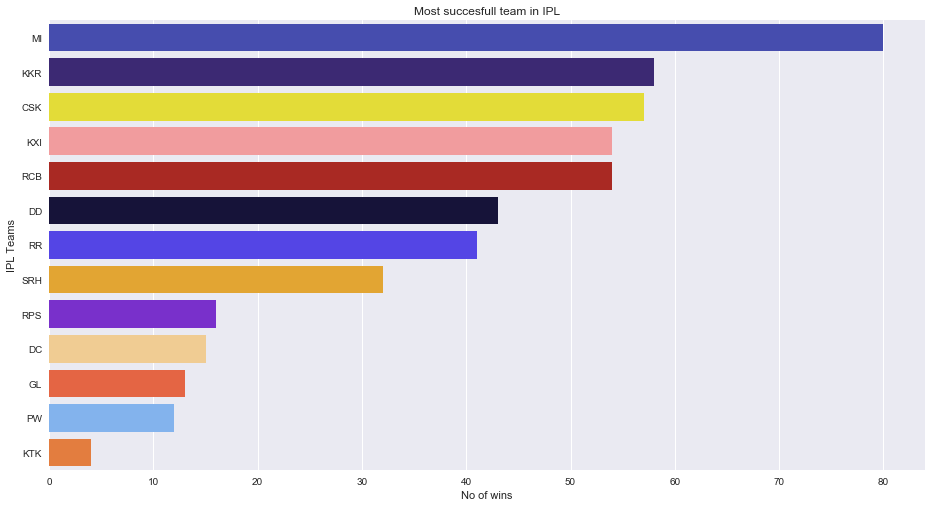

In [7]:
# Data visualization of the sucessful team in IPL

colors = ['#353EBF','#361D7F','#FFF61B','#FF8E90','#BF150D','#110C40','#3E2BFF','#FFAE16','#7716E5','#FFD083','#FF5529','#71B2FF','#FF7623']
team = df_all_matches_winners_sorted['Winner']
win_count = df_all_matches_winners_sorted['count']
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 8.27)
ax = sns.barplot(x=win_count, y=team, data=df_all_matches_winners,palette=colors);
ax.set(xlabel='No of wins', ylabel='IPL Teams',title = 'Most succesfull team in IPL',)
plt.show()

<div class="span25 alert alert-info">
<b>Used the team colors for the chart.</b>
MI seems to be the most succesful team in all of the IPL seasons with 80 wins in 10 seasons followed by KKR with 58 wins in 10 seasons and CSK with 57 in 8 seasons
</div>

In [8]:
df_all_matches_venues = df_all_matches.groupby(['city']).size().reset_index(name='count')
print(df_all_matches_venues.sort_values(by='count', ascending=False).head(8))

          city  count
21      Mumbai     85
2    Bangalore     66
20     Kolkata     61
9        Delhi     60
13   Hyderabad     49
7      Chennai     48
6   Chandigarh     46
15      Jaipur     33


<div class="span25 alert alert-warning">
For IPL 2018, we just need to consider top 8 grounds from the above list. Rest of the grounds can be ignored as some of them were used when IPL was played in South Africa, Dubai and Sharjah. Also when PW, RPS, GL and KTK were playing few new grounds were introduced as their home grounds. Since they are not playing in IPL 2018, we don't need to consider those grounds.
</div>

In [9]:
#create a dataframe to hold just home games and ignore the rest as per home_game flag
df_home_games = df_all_matches[df_all_matches['home_game'] == 1]

#calculate the total number of home games for 8 teams
csk_total_home_games = len(df_home_games[df_home_games['home_team'] == 'CSK'])
srh_total_home_games = len(df_home_games[df_home_games['home_team'] == 'SRH'])
mi_total_home_games = len(df_home_games[df_home_games['home_team'] == 'MI'])
kkr_total_home_games = len(df_home_games[df_home_games['home_team'] == 'KKR'])
kxi_total_home_games = len(df_home_games[df_home_games['home_team'] == 'KXI'])
rcb_total_home_games = len(df_home_games[df_home_games['home_team'] == 'RCB'])
dd_total_home_games = len(df_home_games[df_home_games['home_team'] == 'DD'])
rr_total_home_games = len(df_home_games[df_home_games['home_team'] == 'RR'])

#calculate the total number of home wins for 8 teams
csk_home_wins = len(df_home_games[(df_home_games.home_team == 'CSK') & (df_home_games.FTR == 'H')])
srh_home_wins = len(df_home_games[(df_home_games.home_team == 'SRH') & (df_home_games.FTR == 'H')])
mi_home_wins = len(df_home_games[(df_home_games.home_team == 'MI') & (df_home_games.FTR == 'H')])
kkr_home_wins = len(df_home_games[(df_home_games.home_team == 'KKR') & (df_home_games.FTR == 'H')])
kxi_home_wins = len(df_home_games[(df_home_games.home_team == 'KXI') & (df_home_games.FTR == 'H')])
rcb_home_wins = len(df_home_games[(df_home_games.home_team == 'RCB') & (df_home_games.FTR == 'H')])
dd_home_wins = len(df_home_games[(df_home_games.home_team == 'DD') & (df_home_games.FTR == 'H')])
rr_home_wins = len(df_home_games[(df_home_games.home_team == 'RR') & (df_home_games.FTR == 'H')])

#calculate the percentage of home wins
csk_home_win_per = round(csk_home_wins/csk_total_home_games * 100,0)
srh_home_win_per = round(srh_home_wins/srh_total_home_games * 100,0)
mi_home_win_per = round(mi_home_wins/mi_total_home_games * 100,0)
kkr_home_win_per = round(kkr_home_wins/kkr_total_home_games * 100,0)
kxi_home_win_per = round(kxi_home_wins/kxi_total_home_games * 100)
rcb_home_win_per = round(rcb_home_wins/rcb_total_home_games * 100)
dd_home_win_per = round(dd_home_wins/dd_total_home_games * 100)
rr_home_win_per = round(rr_home_wins/rr_total_home_games * 100)


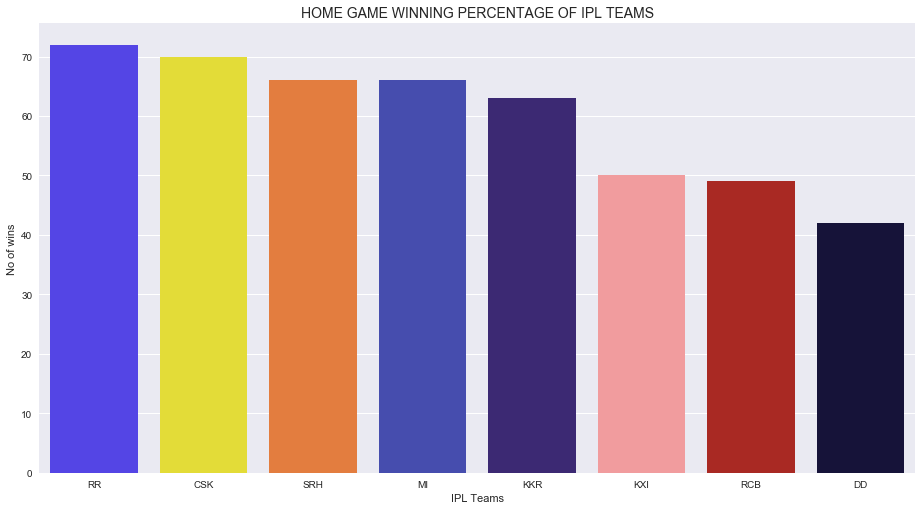

In [10]:
colors = ['#3E2BFF','#FFF61B','#FF7623','#353EBF','#361D7F','#FF8E90','#BF150D','#110C40']
win_per = [rr_home_win_per,csk_home_win_per,srh_home_win_per,mi_home_win_per,kkr_home_win_per,kxi_home_win_per,rcb_home_win_per,dd_home_win_per]
teams = ['RR','CSK','SRH','MI','KKR','KXI','RCB','DD']
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 8.27)
ax = sns.barplot(x=teams, y=win_per,palette=colors);
ax.set(ylabel='No of wins', xlabel='IPL Teams')
title = 'HOME GAME WINNING PERCENTAGE OF IPL TEAMS'
plt.title(title,fontsize = 14)
plt.show()

<div class="span25 alert alert-info">
The winning percentage of RR & CSK has been terrific on their home ground. They have a highest winning percentage of 71% & 70.21% respectively. Even Sunrisers Hyderabad are closely behind with 65.71%. But one thing to notice is that all these three teams have played less games than the other 5 teams. That could be one of the reason why their win % is pretty good at home.
</div>

In [11]:
#calculate the total number of home games for 8 teams
csk_total_away_games = len(df_home_games[df_home_games['away_team'] == 'CSK'])
srh_total_away_games = len(df_home_games[df_home_games['away_team'] == 'SRH'])
mi_total_away_games = len(df_home_games[df_home_games['away_team'] == 'MI'])
kkr_total_away_games = len(df_home_games[df_home_games['away_team'] == 'KKR'])
kxi_total_away_games = len(df_home_games[df_home_games['away_team'] == 'KXI'])
rcb_total_away_games = len(df_home_games[df_home_games['away_team'] == 'RCB'])
dd_total_away_games = len(df_home_games[df_home_games['away_team'] == 'DD'])
rr_total_away_games = len(df_home_games[df_home_games['away_team'] == 'RR'])

#calculate the total number of home wins for 8 teams
csk_away_wins = len(df_home_games[(df_home_games.away_team == 'CSK') & (df_home_games.Winner == 'CSK')])
srh_away_wins = len(df_home_games[(df_home_games.away_team == 'SRH') & (df_home_games.Winner == 'SRH')])
mi_away_wins = len(df_home_games[(df_home_games.away_team == 'MI') & (df_home_games.Winner == 'MI')])
kkr_away_wins = len(df_home_games[(df_home_games.away_team == 'KKR') & (df_home_games.Winner == 'KKR')])
kxi_away_wins = len(df_home_games[(df_home_games.away_team == 'KXI') & (df_home_games.Winner == 'KXI')])
rcb_away_wins = len(df_home_games[(df_home_games.away_team == 'RCB') & (df_home_games.Winner == 'RCB')])
dd_away_wins = len(df_home_games[(df_home_games.away_team == 'DD') & (df_home_games.Winner == 'DD')])
rr_away_wins = len(df_home_games[(df_home_games.away_team == 'RR') & (df_home_games.Winner == 'RR')])

#calculate the percentage of home wins
csk_away_win_per = round(csk_away_wins/csk_total_away_games * 100,0)
srh_away_win_per = round(srh_away_wins/srh_total_away_games * 100,0)
mi_away_win_per = round(mi_away_wins/mi_total_away_games * 100,0)
kkr_away_win_per = round(kkr_away_wins/kkr_total_away_games * 100,0)
kxi_away_win_per = round(kxi_away_wins/kxi_total_away_games * 100)
rcb_away_win_per = round(rcb_away_wins/rcb_total_away_games * 100)
dd_away_win_per = round(dd_away_wins/dd_total_away_games * 100)
rr_away_win_per = round(rr_away_wins/rr_total_away_games * 100)


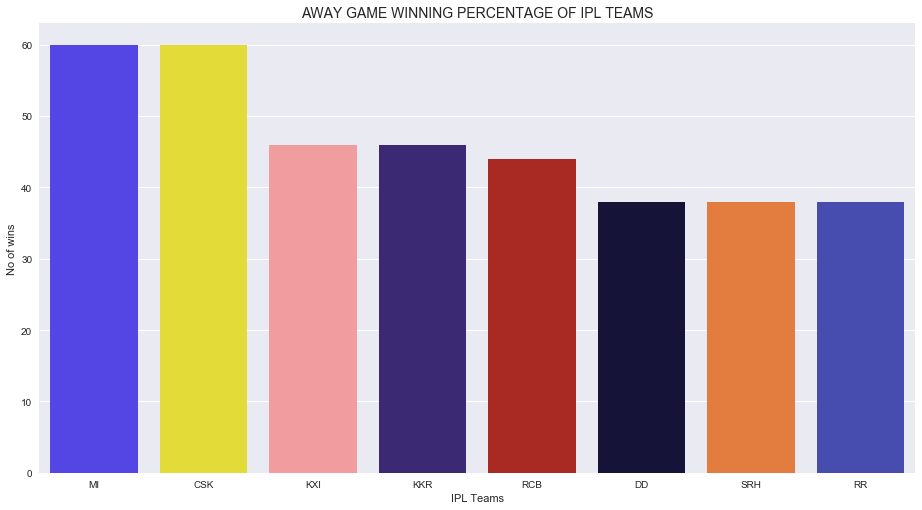

In [12]:
colors = ['#3E2BFF','#FFF61B','#FF8E90','#361D7F','#BF150D','#110C40','#FF7623','#353EBF']
win_per = [mi_away_win_per,csk_away_win_per,kxi_away_win_per,kkr_away_win_per,rcb_away_win_per,dd_away_win_per,srh_away_win_per,rr_away_win_per]
teams = ['MI','CSK','KXI','KKR','RCB','DD','SRH','RR']
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 8.27)
ax = sns.barplot(x=teams, y=win_per,palette=colors);
ax.set(ylabel='No of wins', xlabel='IPL Teams')
title = 'AWAY GAME WINNING PERCENTAGE OF IPL TEAMS'
plt.title(title,fontsize = 14)
plt.show()

<div class="span25 alert alert-info">
MI leads the way in winning away games with 60% closely followed by CSK with a 57%. CSK has been excellent in winning home games and second in winning away games. This is one of the reason why they were able to make it to all the playoffs in all the seasons they have played. Delhi has been poor both in away and home games and RR has been the worst traveler of all seasons.
</div>

In [13]:
#data preprocessing
import pandas as pd
#produces a prediction model in the form of an ensemble of weak prediction models, typically decision tree
#the outcome (dependent variable) has only a limited number of possible values. 
#Logistic Regression is used when response variable is categorical in nature.
from sklearn.linear_model import LogisticRegression
#A random forest is a meta estimator that fits a number of decision tree classifiers 
#on various sub-samples of the dataset and use averaging to improve the predictive 
#accuracy and control over-fitting.
from sklearn.ensemble import RandomForestClassifier
#a discriminative classifier formally defined by a separating hyperplane.
from sklearn.svm import SVC
#displayd data
from IPython.display import display
%matplotlib inline
#produces a prediction model in the form of an ensemble of weak prediction models, typically decision tree
import xgboost as xgb

In [14]:
# Read data and drop redundant column.
data_filtered = df_all_matches[df_all_matches['home_game'] == 1]
# Preview data
data_final = data_filtered[['match_id','HTBA','HTAL','HTBO','HTSC','HTWK','ATBA','ATAL','ATBO','ATSC','ATWK','FTR','HTP','ATP']]

In [15]:
data_filtered.groupby(['season']).size()

season
2008    55
2010    49
2011    60
2012    70
2013    68
2014    25
2015    41
2016    50
2017    56
dtype: int64

In [16]:
data_final.shape

(474, 14)

<div class="span25 alert alert-warning">

<b>So this is the dataset we will use for our modeling as these are complete records which satisfies all conditions.</b>

</div>

### What is the win rate for home team?

In [17]:

# Total number of matches.
n_matches = data_final.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = data_final.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(data_final[data_final.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print ("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print ("Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 474
Number of features: 13
Number of matches won by home team: 259
Win rate of home team: 54.64%


### Plot a scatter matrix for all the features for the Away Team

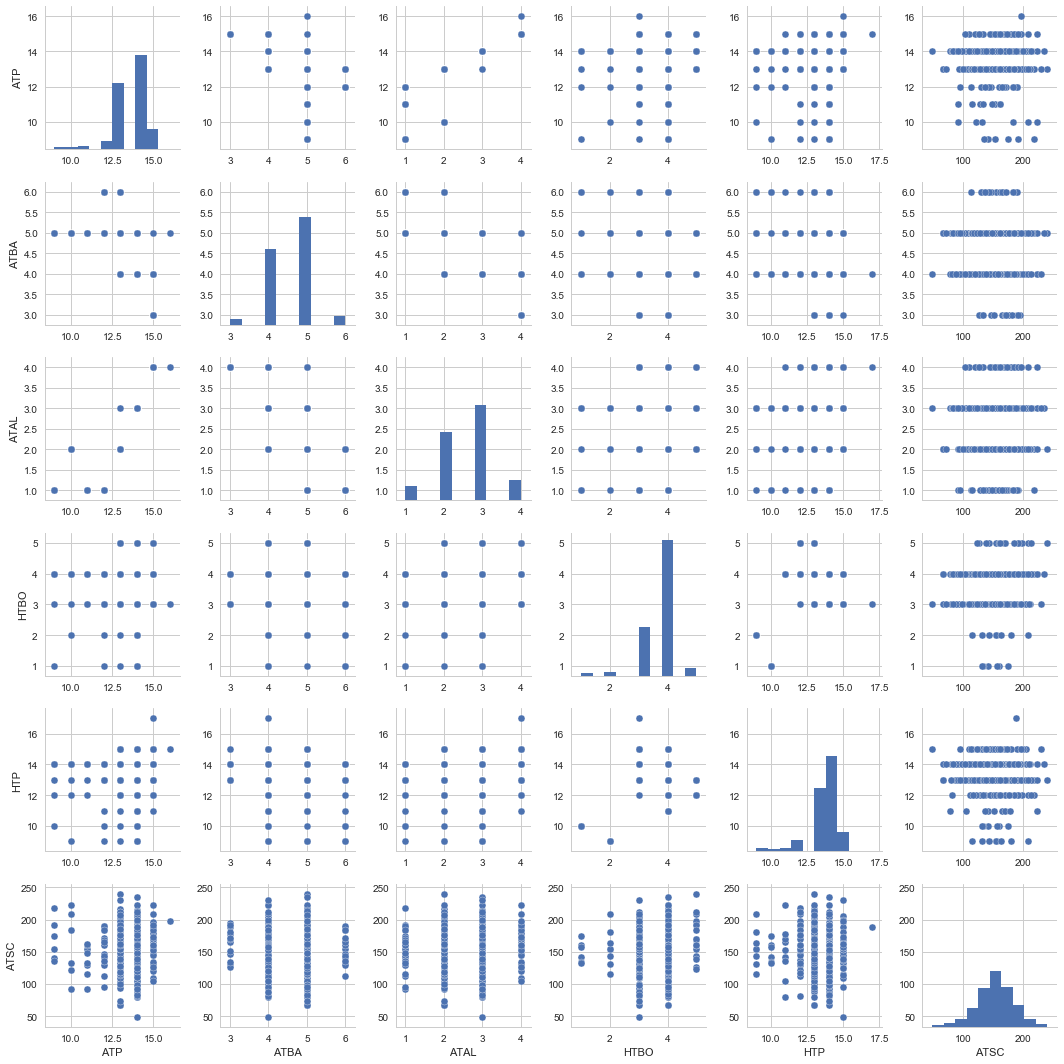

In [18]:
#set all the features for the away team along wth Home team points
#Just to understand how strong the opposition is

sns.set(style='whitegrid',context='notebook')
cols_a=['ATP','ATBA','ATAL','HTBO','HTP','ATSC']
sns.pairplot(data_final[cols_a],size=2.5)
plt.show()

<div class="span25 alert alert-warning">

Some things to note: ‘HTBO’ is the home team bowler. Surprisingly, we cannot read any positive or negative trend between Home team bowler and Away team score.I was expecting this to be positively linear.

We can also see that ATSC is normally distributed, but with some outliers.
</div>

### Plot a scatter matrix for all the features for the Home Team

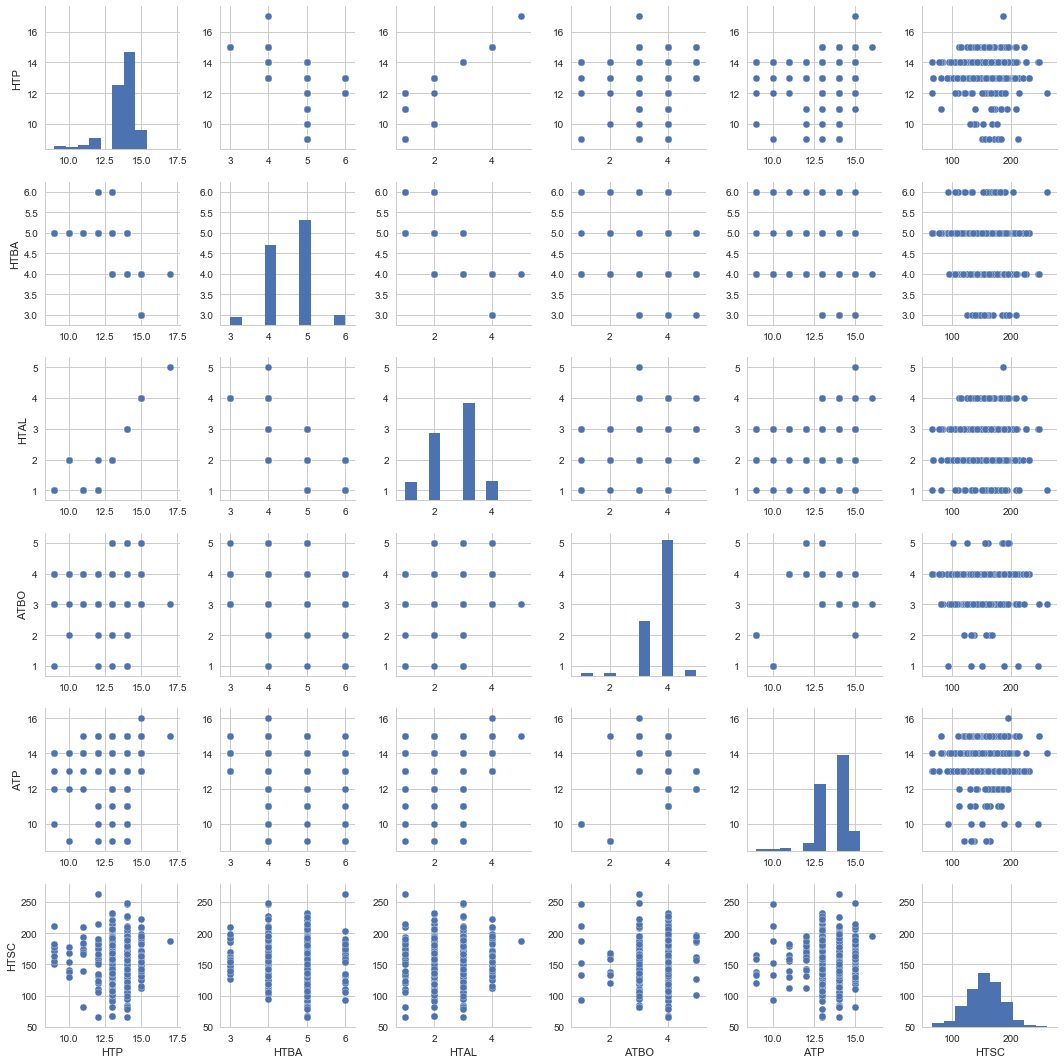

In [19]:
#set all the features for the Home team along wth Away team points
#Just to understand how strong the opposition is

sns.set(style='whitegrid',context='notebook')
cols_h=['HTP','HTBA','HTAL','ATBO','ATP','HTSC']
sns.pairplot(data_final[cols_h],size=2.5)
plt.show()

<div class="span25 alert alert-warning">

Same observation for home team. HTSC is normally distributed with no outliers. Not much of a trend or pattern we can derive from the ATBO & HTSC. I was expecting to see a trend between home team score and away team bowlers, but it doesn't seem to be there.

</div>

#### A correlation matrix to quantify linear relationship between the features

##### 1. Home Team

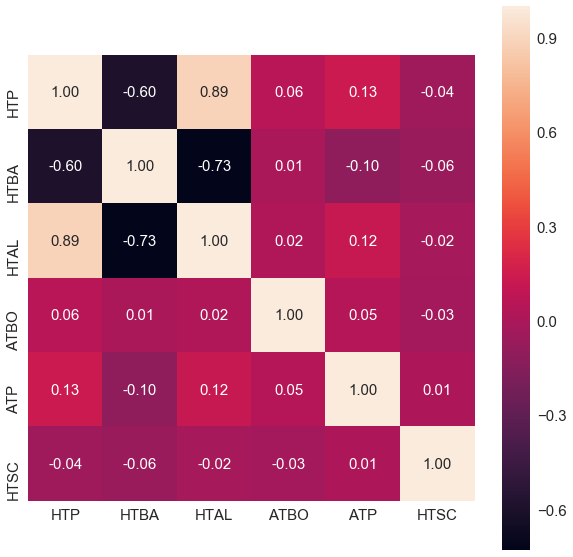

In [20]:
cm_h = np.corrcoef(data_final[cols_h].values.T)
sns.set(font_scale=1.5)
# Set figure width to 10 and height to 10
plt.figure(figsize=(10,10))
hm = sns.heatmap(cm_h,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=cols_h,
                xticklabels=cols_h)
plt.show()

<div class="span25 alert alert-warning">
HTBA (Home Team Batsman) is the most negatively correlated with HTSC (Home Team Score) which is surprising because you normally expect a team to score more when they have more batsman in their team. But it looks like every time a team has played a match with more batsman, less they score.  
</div>

##### 2. Away Team

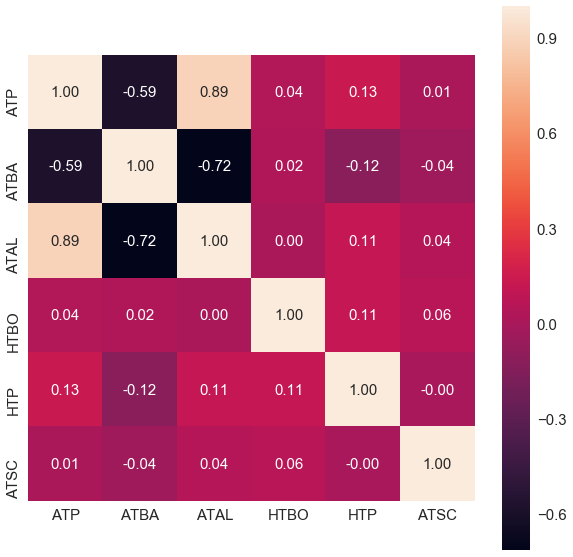

In [21]:
cm_a = np.corrcoef(data_final[cols_a].values.T)
sns.set(font_scale=1.5)
# Set figure width to 10 and height to 10
plt.figure(figsize=(10,10))
hm1 = sns.heatmap(cm_a,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=cols_a,
                xticklabels=cols_a)
plt.show()

<div class="span25 alert alert-warning">
Again ATBA (Away Team Batsman) is the most negatively correlated with ATSC (Away Team Score). Also Away Team Score has a positive realtion with Home Team Bowlers. So more specialized bowlers in opposition team, more runs you score. 

<br><br>
<b>
Note: As mentioned in the begining, we need to build more features to perfect the model. </b>
</div>

In [22]:
#reading all matches csv and assigning it to dataframe
df_matches_list = pd.read_excel('data/df_final_ipl_matches_data.xls',header = 0)
#checking whether all season are there
df_matches_list.head()

,match_id,season,city,date,home_game,HT_id,AT_id,home_team,away_team,toss_winner,...,ATBO,ATSC,ATWK,ATOV,N,FTR,Winner,win_by_runs,win_by_wickets,player_of_match
0,1,2008,Bangalore,2008-04-18,1,6,3,RCB,KKR,RCB,...,3,222,3,15.1,1,A,KKR,140,0,BB McCullum
1,2,2008,Chandigarh,2008-04-19,1,7,2,KXI,CSK,CSK,...,4,240,5,20.0,0,A,CSK,33,0,MEK Hussey
2,3,2008,Delhi,2008-04-19,1,8,5,DD,RR,RR,...,4,129,10,15.1,1,H,DD,0,9,MF Maharoof
3,4,2008,Mumbai,2008-04-20,1,1,6,MI,RCB,MI,...,4,166,5,19.0,1,A,RCB,0,5,MV Boucher
4,5,2008,Kolkata,2008-04-20,1,3,11,KKR,DC,DC,...,4,110,5,19.4,0,H,KKR,0,5,DJ Hussey


In [23]:
# Adding Home Winning Percentage and Away Winning Percentage in the final dataframe.
df_matches_list['HWP'] = 0
df_matches_list['AWP'] = 0
df_matches_list['HBRR'] = 0
df_matches_list['HBER'] = 0
df_matches_list['HBAR'] = 0
df_matches_list['HBOA'] = 0
df_matches_list['ABRR'] = 0
df_matches_list['ABER'] = 0
df_matches_list['ABAR'] = 0
df_matches_list['ABOA'] = 0

In [24]:
#Create a new column for Home Team Win which we will use as the target value
df_matches_list['HTW'] = 0
def updateHTW():
    k = len(df_matches_list)
    for I in range(0,k):
        if(df_matches_list.iloc[I]['home_team'] == df_matches_list.iloc[I]['Winner']):
            df_matches_list.loc[I,'HTW'] = 1
        else:
            df_matches_list.loc[I,'HTW'] = 0

#call the function
updateHTW()

## More Team Features
<div class="span25 alert alert-warning"> <br>
Let's calculate more features to make our machine learning more accurate

<b>Win Percentages	For previous x games : Games won/x  </b><br>
<b>Batting Run Rate	Runs scored in previous x games/Overs batted  </b><br>
<b>Bowling Economy Rate	Runs conceeded in previous x games/Over bowled </b><br>
<b>Batting Average	Runs scored in previous x games/Wickets lost  </b><br>
<b>Bowling Average	Runs conceeded in previous x games/Wickets taken </b> <br>


<br><br>
<b> New Features Added in dataframe </b>

HWP - Home Win Percentage    <br>
AWP - Away Win Percentage    <br>
HBRR - Home Batting Run Rate    <br>
HBER - Home Bowling Economy Rate    <br>
HBAR - Home Batting Average	Runs scored    <br>
HBOA - Home Bowling Average	Runs conceeded    <br>
ABRR - Away Batting Run Rate    <br>
ABER - Away Bowling Economy Rate    <br>
ABAR - Away Batting Average	Runs scored    <br>
ABOA - Away Bowling Average	Runs conceeded    <br>
<br>
</div>

In [25]:
#function to update Home Winning Percentage
def updateHWP(team):
    k = len(df_matches_list)
    total_matches_played = 0
    total_win = 0
    total_home_runs = 0
    total_home_overs = 0
    total_home_wickets = 0
    total_opp_runs_given = 0
    total_opp_over_bowled = 0
    total_opp_wickets_taken = 0
    for I in range(0,k):
        if(df_matches_list.iloc[I]['home_team'] == team):
            
            #add totals from previous matches

            total_matches_played = total_matches_played + 1
            total_home_runs = total_home_runs + df_matches_list.iloc[I]['HTSC']
            total_home_overs = total_home_overs + df_matches_list.iloc[I]['HTBO']
            total_home_wickets = total_home_wickets + df_matches_list.iloc[I]['HTWK']
                
            total_opp_runs_given = total_opp_runs_given + df_matches_list.iloc[I]['ATSC']
            total_opp_over_bowled = total_opp_over_bowled + df_matches_list.iloc[I]['ATBO']
            total_opp_wickets_taken = total_opp_wickets_taken + df_matches_list.iloc[I]['ATWK']
            
            #calculate the new features
            home_batting_run_rate = total_home_runs/total_home_overs
            home_bowling_eco_rate = total_opp_runs_given/total_opp_over_bowled
            home_batting_avg_runs = total_home_runs/total_home_wickets
            home_bowling_avg = total_opp_runs_given/total_opp_wickets_taken
            
            #Update the new features in the dataframe
            df_matches_list.loc[I,'HBRR'] = round(home_batting_run_rate,2)
            df_matches_list.loc[I,'HBER'] = round(home_bowling_eco_rate,2)
            df_matches_list.loc[I,'HBAR'] = round(home_batting_avg_runs,2)
            df_matches_list.loc[I,'HBOA'] = round(home_bowling_avg,2)
            
            
            if(df_matches_list.iloc[I]['Winner'] == team):
                total_win = total_win + 1
                win_percentage = (total_win/total_matches_played) * 100
                df_matches_list.loc[I,'HWP'] = round(win_percentage,2)
            else:
                win_percentage = (total_win/total_matches_played) * 100
                df_matches_list.loc[I,'HWP'] = round(win_percentage,2)

                
#function to update Away Winning Percentage

def updateAWP(team):
    k = len(df_matches_list)
    total_matches_played = 0
    total_win = 0
    total_away_runs = 0
    total_away_overs = 0
    total_away_wickets = 0
    total_away_opp_runs_given = 0
    total_away_opp_over_bowled = 0
    total_away_opp_over_bowled = 0
    for I in range(0,k):
        if(df_matches_list.iloc[I]['away_team'] == team):
            total_matches_played = total_matches_played + 1
            total_away_runs = total_away_runs + df_matches_list.iloc[I]['ATSC']
            total_away_overs = total_away_overs + df_matches_list.iloc[I]['ATBO']
            total_away_wickets = total_away_wickets + df_matches_list.iloc[I]['ATWK']
            
        
            #add totals from previous matches
            total_away_opp_runs_given = total_away_opp_runs_given + df_matches_list.iloc[I]['HTSC']
            total_away_opp_over_bowled = total_away_opp_over_bowled + df_matches_list.iloc[I]['HTBO']
            total_away_opp_wickets_taken = total_away_opp_over_bowled + df_matches_list.iloc[I]['HTWK']
            
            #calculate the new features
            away_batting_run_rate = total_away_runs/total_away_overs
            away_bowling_eco_rate = total_away_opp_runs_given/total_away_opp_over_bowled
            away_batting_avg_runs = total_away_runs/total_away_wickets
            away_bowling_avg = total_away_opp_runs_given/total_away_opp_wickets_taken
            
            #Update the new features in the dataframe
            df_matches_list.loc[I,'ABRR'] = round(away_batting_run_rate,2)
            df_matches_list.loc[I,'ABER'] = round(away_bowling_eco_rate,2)
            df_matches_list.loc[I,'ABAR'] = round(away_batting_avg_runs,2)
            df_matches_list.loc[I,'ABOA'] = round(away_bowling_avg,2)
            
            
            
            if(df_matches_list.iloc[I]['Winner'] == team):
                total_win = total_win + 1
                win_percentage = (total_win/total_matches_played) * 100
                df_matches_list.loc[I,'AWP'] = round(win_percentage,2)
            else:
                win_percentage = (total_win/total_matches_played) * 100
                df_matches_list.loc[I,'AWP'] = round(win_percentage,2)                

In [26]:
#call each team to update the home winning and away winning percentage in df_matches_list dataframe
team_names = ['MI','CSK','SRH','KKR','RCB','KXI','DD','RR','DC','RPS','GL','KTK','PW']
df_teams = pd.DataFrame(team_names, columns = ['teams'])
for row in df_teams['teams']:
    updateHWP(row)
    updateAWP(row)

In [27]:
df_matches_list.tail(5)

,match_id,season,city,date,home_game,HT_id,AT_id,home_team,away_team,toss_winner,...,AWP,HBRR,HBER,HBAR,HBOA,ABRR,ABER,ABAR,ABOA,HTW
469,629,2017,Kanpur,2017-05-13,1,10,4,GL,SRH,SRH,...,38.46,47.27,46.00,25.49,35.55,42.12,43.41,28.08,39.36,0
470,630,2017,Kolkata,2017-05-13,1,3,1,KKR,MI,KKR,...,60.34,43.37,39.95,28.58,24.97,42.67,41.52,28.95,40.02,0
471,631,2017,Pune,2017-05-14,1,9,7,RPS,KXI,RPS,...,45.61,44.72,45.72,33.54,26.61,38.14,43.19,23.46,42.99,1
472,632,2017,Delhi,2017-05-14,1,8,6,DD,RCB,RCB,...,43.86,40.50,43.80,25.56,27.89,42.48,44.19,28.41,42.20,0
473,633,2017,Mumbai,2017-05-16,1,1,9,MI,RPS,MI,...,68.75,44.66,41.47,27.83,24.03,40.73,41.09,28.95,35.48,0


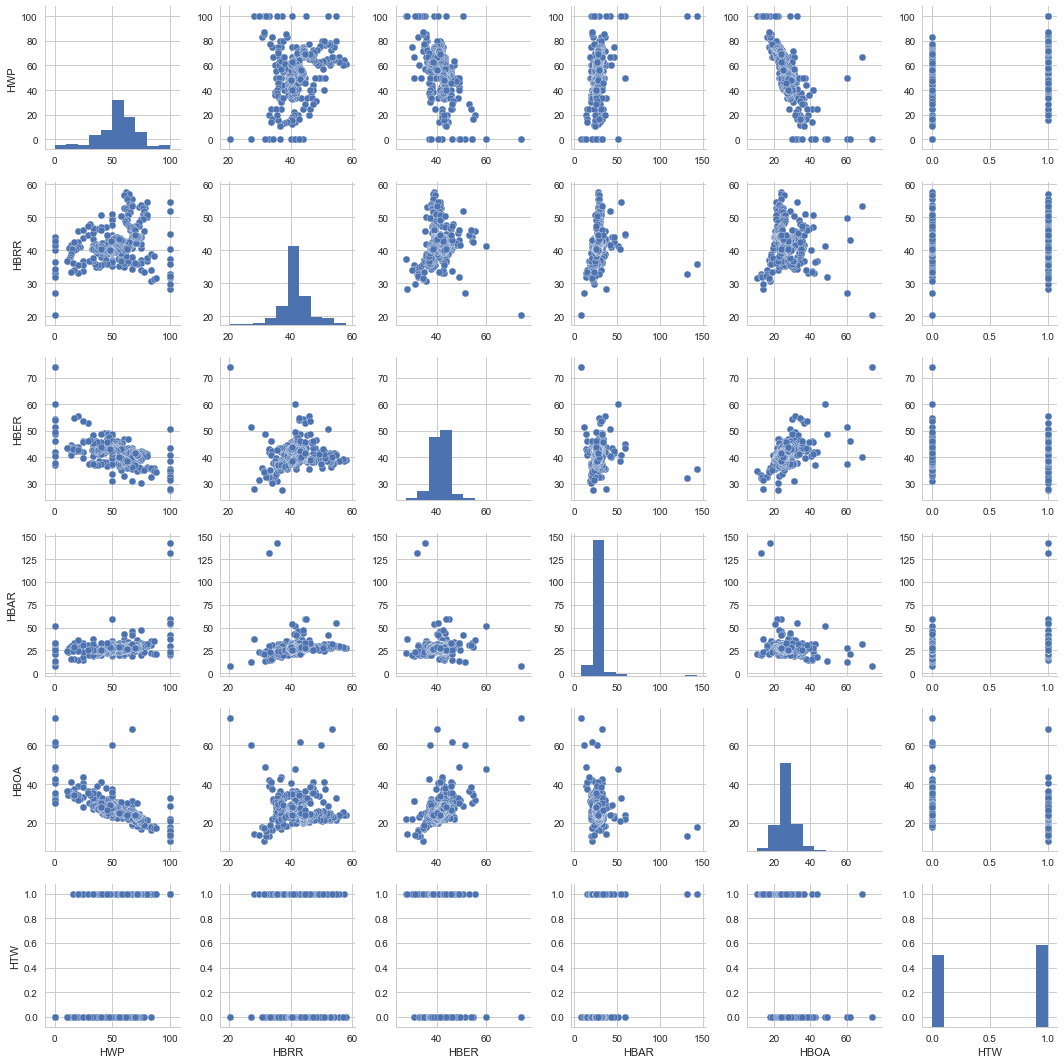

In [28]:
#set all the features for the Home team along wth Away team points
#Just to understand how strong the opposition is

sns.set(style='whitegrid',context='notebook')
cols_h=['HWP','HBRR','HBER','HBAR','HBOA','HTW']
sns.pairplot(df_matches_list[cols_h],size=2.5)
plt.show()

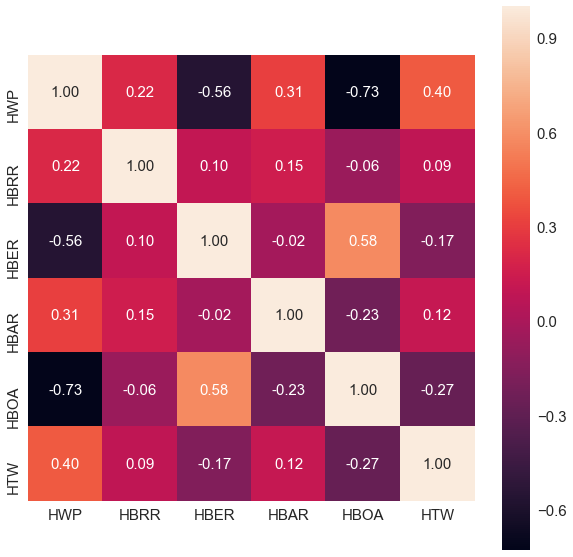

In [29]:
cm_h = np.corrcoef(df_matches_list[cols_h].values.T)
sns.set(font_scale=1.5)
# Set figure width to 10 and height to 10
plt.figure(figsize=(10,10))
hm = sns.heatmap(cm_h,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=cols_h,
                xticklabels=cols_h)
plt.show()

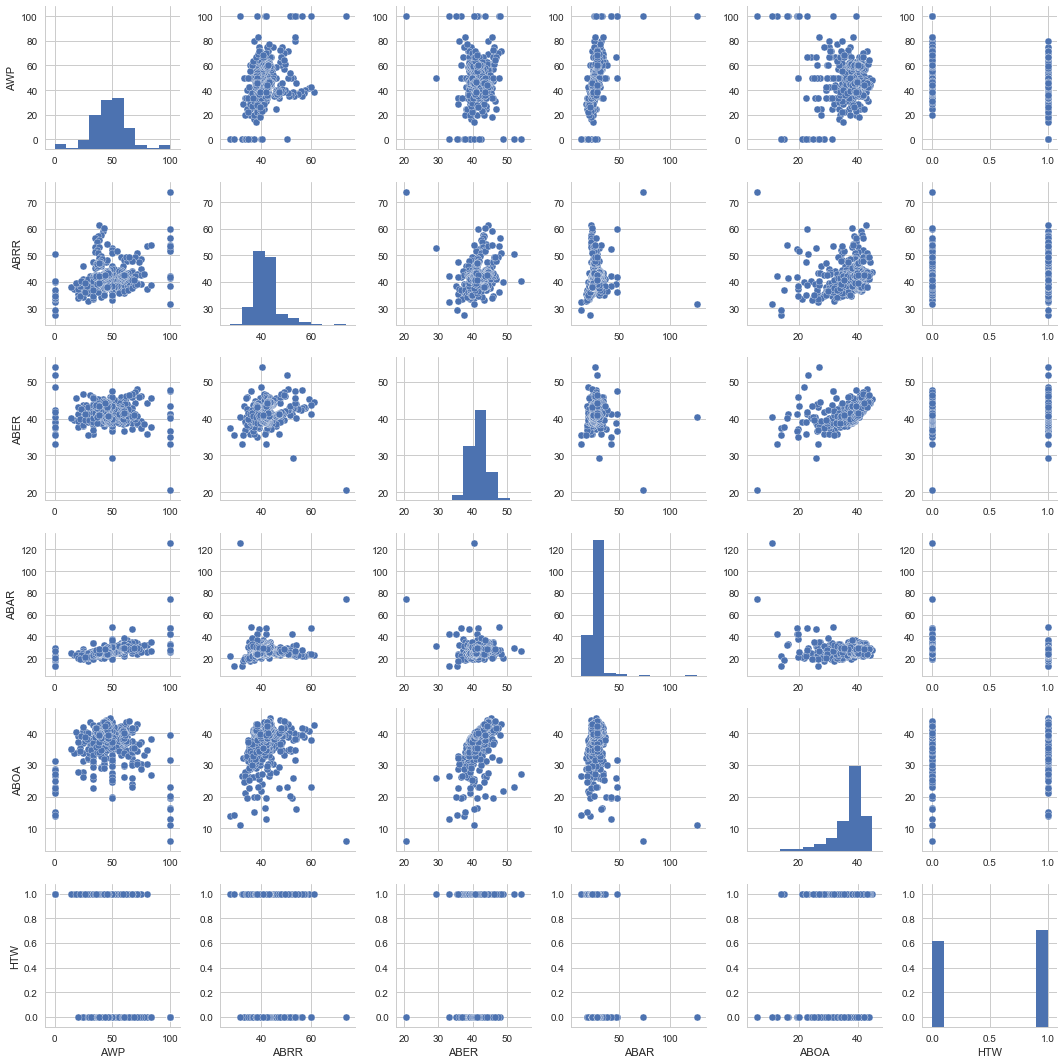

In [30]:
#set all the features for the Home team along wth Away team points
#Just to understand how strong the opposition is

sns.set(style='whitegrid',context='notebook')
cols_a=['AWP','ABRR','ABER','ABAR','ABOA','HTW']
sns.pairplot(df_matches_list[cols_a],size=2.5)
plt.show()

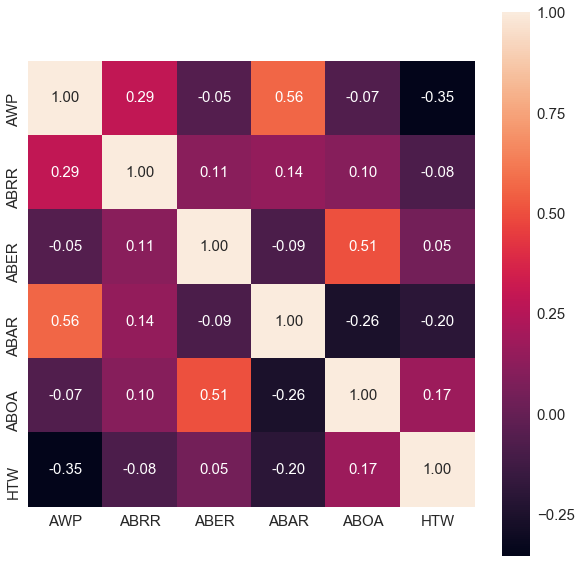

In [31]:
cm_a = np.corrcoef(df_matches_list[cols_a].values.T)
sns.set(font_scale=1.5)
# Set figure width to 10 and height to 10
plt.figure(figsize=(10,10))
hm2 = sns.heatmap(cm_a,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=cols_a,
                xticklabels=cols_a)
plt.show()

Text(0.5,1,'Relationship between Score & Win%')

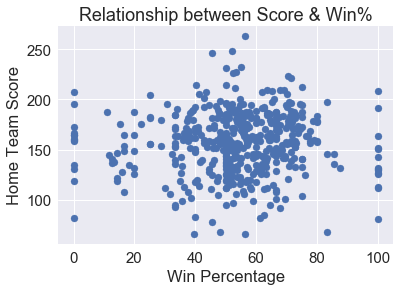

In [32]:
# Plot price vs average number of rooms
plt.scatter(df_matches_list.HWP, df_matches_list.HTSC)
plt.xlabel("Win Percentage")
plt.ylabel("Home Team Score")
plt.title("Relationship between Score & Win%")

Text(0.5,1,'Relationship between Home team score & Winning Percentage')

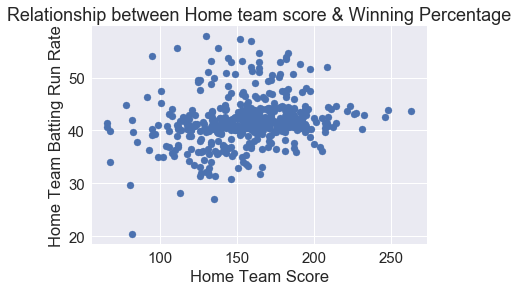

In [487]:
# Plot price vs average number of rooms
plt.scatter(df_matches_list.HTSC, df_matches_list.HBRR)
plt.xlabel("Home Team Score")
plt.ylabel("Home Team Batting Run Rate")
plt.title("Relationship between Home team score & Winning Percentage")

In [536]:
#Create a dataframe for machine learning containing only id and other features
data_ipl_ml = df_matches_list[['HTB','ATB','HTP','HTAL','HTBO','HTSC','ATSC','HTWK','HTOV','ATP','ATAL','ATBO','ATOV','ATWK','HBRR','HBER','HBAR','HBOA','HWP','ABRR','ABER','ABAR','ABOA','AWP','HTW']]
data_ipl_ml.shape


(474, 25)

<div class="span25 alert alert-warning"> <br>
<b>Let’s fit linear, quadratic, and cubic polynomial models.</b>
</div>

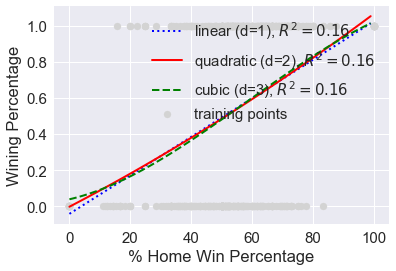

In [537]:
L = data_ipl_ml[['HWP']].values
y = data_ipl_ml['HTW'].values
regr = LinearRegression()

quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
L_quad = quadratic.fit_transform(L)
L_cubic = cubic.fit_transform(L)

# linear fit
L_fit = np.arange(L.min(), L.max(), 1)[:, np.newaxis]
regr = regr.fit(L,y)
y_lin_fit = regr.predict(L_fit)
linear_r2 = r2_score(y, regr.predict(L))

# quadratic fit
regr = regr.fit(L_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(L_fit))
quadratic_r2 = r2_score(y, regr.predict(L_quad))

# cubic fit
regr = regr.fit(L_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(L_fit))
cubic_r2 = r2_score(y, regr.predict(L_cubic))

#Plot results
plt.scatter(L, y,
           label='training points',
           color='lightgray')
plt.plot(L_fit, y_lin_fit,
        label='linear (d=1), $R^2=%.2f$'
        % linear_r2,
        color='blue',
        lw=2,
        linestyle=':')
plt.plot(L_fit, y_quad_fit,
        label='quadratic (d=2), $R^2=%.2f$'
        % quadratic_r2,
        color='red',
        lw=2,
        linestyle='-')
plt.plot(L_fit, y_cubic_fit,
        label='cubic (d=3), $R^2=%.2f$'
        % cubic_r2,
        color='green',
        lw=2,
        linestyle='--')
plt.xlabel('% Home Win Percentage')
plt.ylabel('Wining Percentage')
plt.legend(loc='upper right')
plt.show()

### Fitting multiple regression models
Now let’s fit a regression model with some or all of the features. First I’ll use this helper function to pick the best model and hyperparameters:

In [538]:
# Models to try
models = {
    'RFC': RandomForestClassifier()
}

# Parameters to try (this is not an exahustive GridSearch)

# Note: I'm just throwing linear regression into the GridSearch for comparison
# but not making much of an attempt effort to make it work well
# by scaling the variables, etc.

params = {
    'RFC': {'max_depth': [4,6],
            'min_samples_leaf': [3, 5, 9],
            'max_features': [1.0, 0.3, 0.1],
            'n_estimators' : [100,500,800]}
}

In [539]:
X = data_ipl_ml.drop('HTW', axis=1) # Using all the features
y = data_ipl_ml['HTW'].values # Target variable

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state = 0)

In [530]:
class EstimatorSelectionHelper:
    
    """
    A helper class for running parameter grid search across different models. 
    It takes two dictionaries. The first contains the models to be scored. 
    The second contains the parameters for each model
    """
    
    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}
    
    
    
    def fit(self, X, y, cv=3, n_jobs=1, verbose=1, scoring=None, refit=False): 
        """
        fit(X,y) method runs a parameter grid search with cross validation for each model
        and for the given training data. If scoring=None, the score method of the estimator is used.
        """
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs, 
                              verbose=verbose, scoring=scoring, refit=refit)
            gs.fit(X,y)
            self.grid_searches[key] = gs 
            
    
    
    def score_summary(self, sort_by='mean_score'):
        """
        After calling fit(X,y), the score_summary() method returns a df with a summary of the scores
        """
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
                }

            return pd.Series(dict(list( params.items()) + list(d.items() ))) #sum up two dicts
                      
        rows = [row(k, gsc.cv_validation_scores, gsc.parameters) 
                for k in self.keys
                for gsc in self.grid_searches[k].grid_scores_]
        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)
        
        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]
        
        return df[columns]

In [531]:
helper = EstimatorSelectionHelper(models, params)
helper.fit(X_train, y_train, n_jobs=-1)

Running GridSearchCV for RFC.
Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  1.4min finished


In [532]:
helper.score_summary()

,estimator,min_score,mean_score,max_score,std_score,max_depth,max_features,min_samples_leaf,n_estimators
46,RFC,0.863636,0.909309,0.936364,0.0324787,6,0.1,3,500
47,RFC,0.872727,0.906306,0.927273,0.0239876,6,0.1,3,800
50,RFC,0.872727,0.903249,0.927928,0.0229111,6,0.1,5,800
49,RFC,0.881818,0.903249,0.927928,0.0189639,6,0.1,5,500
45,RFC,0.881818,0.897243,0.90991,0.011633,6,0.1,3,100
48,RFC,0.872727,0.894267,0.918182,0.0186326,6,0.1,5,100
11,RFC,0.881818,0.89424,0.900901,0.00879103,4,0.3,3,800
22,RFC,0.863636,0.894212,0.90991,0.0216231,4,0.1,5,500
23,RFC,0.863636,0.894185,0.918919,0.0229405,4,0.1,5,800
10,RFC,0.881818,0.891237,0.9,0.00743714,4,0.3,3,500


<div class="span25 alert alert-warning">
All of the output is shown above. The Random Forest Classifier perform the best. In all fairness to the linear models, I could have done more to make them better, like scale and log transform some of the variables (we already saw that some of them were skewed). I also arbitrarily set n_estimators (for RandomForest and GBR) to 1000.

So I could try to optimize the hyperparameters more, but for now I’ll move ahead with the highest scoring model from this GridSearch   <br>


</div>

<div class="span25 alert alert-warning">
It looks like we are overfitting a bit since the error is little higher on the test set than the train and R^2 is lower on the test set than the train. But the model is still able to explain the relationship between the target variable and explanatory variable relatively well (R^2 =.751 on the test set).
</div>

<div class="span25 alert alert-warning"> 
As we already saw with the MAE and R^2, we can see that the model fits the training data better than the test data, as indicated by some of the outliers in the vertical direction.
</div>

### Feature importance

### Random Forest Classifier

In [540]:
rfc = RandomForestClassifier(n_estimators=1000, random_state =0
                            ,max_features=.3, min_samples_leaf=3,max_depth=8)
rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)


In [541]:
rfc_predicted = rfc.predict(X_test)

In [535]:
print('MAE train: %.3f, test: %.3f' % (
    mean_absolute_error(y_train, y_train_pred),
    mean_absolute_error(y_test, y_test_pred)))
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, rfc.predict(X_train)),
    mean_squared_error(y_test, rfc_predicted)))
print('R^2 train: %.3f, test: %.3f' % (
    (r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred))))

MAE train: 0.003, test: 0.063
MSE train: 0.003, test: 0.063
R^2 train: 0.988, test: 0.748


In [512]:
print(accuracy_score(y_test, rfc.predict(X_test)))

0.937062937063


<div class="span25 alert alert-warning"> 
The top 6 features are:  <br>
1. HTWK - Home Team Wicket  <br>
2. ATWK - Away Team Wicket  <br>
3. ATOV - Away Team Over  <br>
4. ATSC -  Away Team Score  <br>
5. HWP - Home Winning Percentage  <br> 
6. AWP - Away Winning Percentage <br>
</div>

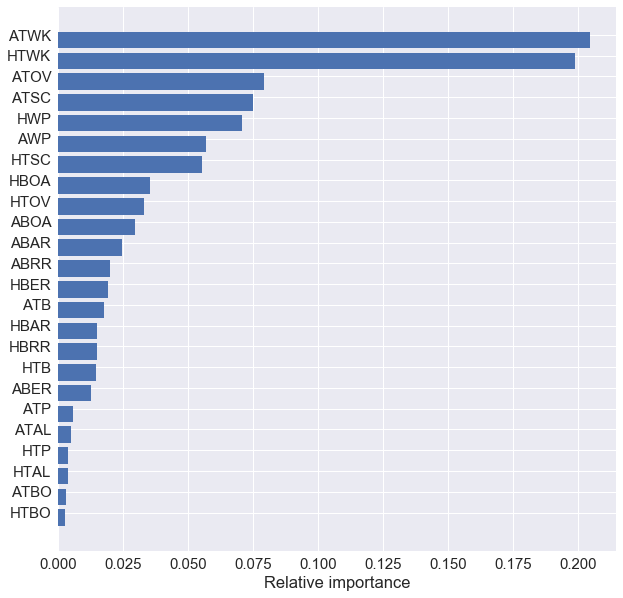

In [542]:
plt.figure(figsize=(10,10))
indices = np.argsort(rfc.feature_importances_)
names=list(X.columns.values)
plt.barh(np.arange(len(names)), rfc.feature_importances_[indices])
plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])
_ = plt.xlabel('Relative importance')

In [500]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rfc_predicted)
cm

array([[61, 10],
       [ 6, 66]])

In [544]:
# Produce a matrix for home team performance
home_team_data = [[1,2,13,2,4,165,200,6,20,12,1,4,19,5,41.25,41.5,27.5,33.2,0,41.5,41.25,33.2,16.5,100]]  # Client 1

# Show predictions
for i, HTW in enumerate(rfc.predict(home_team_data)):
    print ("Predicted home win for team as per RFC:",HTW)

Predicted home win for team as per RFC: 0


<div class="span25 alert alert-warning">
<b>Based on the result so far, we can come to a conclusion that both Random Forest classifier and Gradient boosting regressor seems to be yielding best results.
</div>